## Imports

In [8]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt

In [9]:
np.set_printoptions(threshold=sys.maxsize)

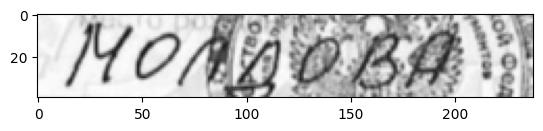

In [10]:
default_img = cv2.imread('/kaggle/input/cyrillic-handwriting-dataset/train/aa1.png', 0)
img = cv2.cvtColor(default_img, cv2.COLOR_GRAY2BGR)
plt.imshow(img)

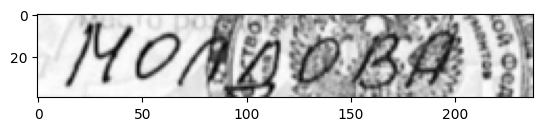

In [11]:
img = cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
plt.imshow(img)

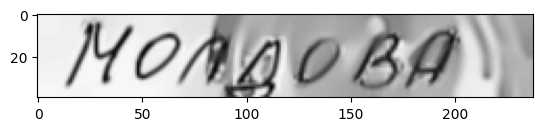

In [12]:
img = cv2.fastNlMeansDenoisingColored(img, img, 19, 19, 9, 19)
img = cv2.fastNlMeansDenoisingColored(img, img, 10, 10, 7, 10)
plt.imshow(img)

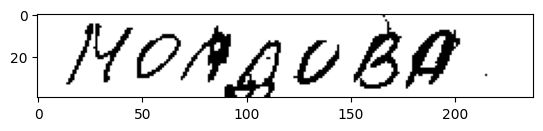

In [15]:
res = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res = cv2.normalize(res, res, 0, 1.0, cv2.NORM_MINMAX)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) [1]
res = cv2.cvtColor(res, cv2.COLOR_GRAY2BGR)
plt.imshow(res)

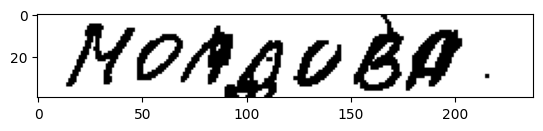

In [16]:
kernel = np.ones((2,2),np.uint8)
res = cv2.erode(res, kernel, iterations = 1)
plt.imshow(res)